In [ ]:
import requests
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import TfidfVectorizer
import string


stop_words = {
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
    'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself',
    'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them',
    'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this',
    'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been',
    'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing',
    'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until',
    'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between',
    'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to',
    'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again',
    'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why',
    'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other',
    'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so',
    'than', 'too', 'very', 'can', 'will', 'just', 'don', 'should', 'now'
}


def scrape_text_from_url(url):
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.content, 'html.parser')
        paragraphs = soup.find_all('p')
        text = ' '.join(p.get_text() for p in paragraphs)
        text = text.lower().translate(str.maketrans('', '', string.punctuation))
        return text
    except Exception as e:
        return ""


def extract_keywords_tfidf(text, top_n=50):
    words = [word for word in text.split() if word not in stop_words]
    filtered_text = ' '.join(words)

    if not filtered_text.strip():
        raise ValueError("Text is empty after stopword removal. Cannot compute TF-IDF.")

    vectorizer = TfidfVectorizer(
        stop_words='english',
        ngram_range=(1, 5),
        max_features=top_n * 5
    )

    tfidf_matrix = vectorizer.fit_transform([filtered_text])
    scores = zip(vectorizer.get_feature_names_out(), tfidf_matrix.toarray()[0])
    sorted_keywords = sorted(scores, key=lambda x: x[1], reverse=True)

    return [word for word, score in sorted_keywords[:top_n]]


urls = [
    "https://en.wikipedia.org/wiki/Prolonged_grief_disorder",
    "https://www.verywellmind.com/how-grief-affects-your-mental-health-5199246",
    "https://www.mayoclinic.org/healthy-lifestyle/end-of-life/in-depth/grief/art-20045340",
    "https://www.nimh.nih.gov/health/topics/coping-with-loss",
    "https://www.helpguide.org/articles/grief/coping-with-grief-and-loss.htm"
]


all_text = ''
for url in urls:
    all_text += scrape_text_from_url(url) + ' '

top_keywords = extract_keywords_tfidf(all_text, top_n=500)
top_keywords


['grief',
 'loss',
 'pgd',
 'nimh',
 'research',
 'mental',
 'feel',
 'grieving',
 'health',
 'help',
 'support',
 'death',
 'life',
 'symptoms',
 'disorder',
 'loved',
 'prolonged',
 'bereavement',
 'family',
 'prolonged grief',
 'bereaved',
 'people',
 'cancer',
 'pain',
 'care',
 'experience',
 'including',
 'mental health',
 'include',
 'time',
 'know',
 'normal',
 'caregivers',
 'criteria',
 'feeling',
 'feelings',
 'person',
 'therapy',
 'disorders',
 'don',
 'process',
 'social',
 'deceased',
 'depression',
 'emotional',
 'evidence',
 'example',
 'intense',
 'learn',
 'prevalence',
 'resources',
 'significant',
 'stages',
 'use',
 'complicated',
 'diagnosis',
 'emotions',
 'grief disorder',
 'important',
 'individuals',
 'information',
 'lost',
 'prolonged grief disorder',
 'shown',
 'cause',
 'clinical',
 'complicated grief',
 'difficult',
 'dsm5tr',
 'experiencing',
 'friend',
 'funding',
 'grieve',
 'groups',
 'icd11',
 'included',
 'increased',
 'anxiety',
 'close',
 'coping

In [ ]:
!pip install --upgrade numpy
!pip install --upgrade --force-reinstall gensim


  Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.5 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.
  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (

In [ ]:
import gensim.downloader as api
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np


model = api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:

def get_phrase_vector(phrase):
    words = phrase.lower().split()
    valid_vectors = []

    for word in words:
        try:
            vec = model[word]
            valid_vectors.append(vec)
        except KeyError:
            continue

    if valid_vectors:
        return np.mean(valid_vectors, axis=0)
    else:
        return np.zeros(300)

def calculate_similarity_top_keywords(keywords, grief_terms, top_k=200):
    keyword_scores = {}

    for keyword in keywords:
        keyword_vector = get_phrase_vector(keyword)
        if not keyword_vector.any():
            continue

        max_similarity = 0.0
        for grief_term in grief_terms:
            grief_vector = get_phrase_vector(grief_term)
            if not grief_vector.any():
                continue
            similarity = cosine_similarity([keyword_vector], [grief_vector])[0][0]
            max_similarity = max(max_similarity, similarity)

        keyword_scores[keyword] = max_similarity

    sorted_keywords = dict(sorted(keyword_scores.items(), key=lambda x: x[1], reverse=True)[:top_k])
    return sorted_keywords


In [ ]:
grief_terms = [
    "lost my mom", "lost my mother", "lost my dad", "lost my father", "lost my brother", "lost my sister",
    "lost my grandma", "lost my grandfather", "lost my spouse", "lost my husband", "lost my wife",
    "lost my son", "lost my daughter", "passed away", "death in the family", "sudden loss", "tragic loss",
    "mourning a loved one", "grieving a loss", "I miss my mom", "coping with loss", "can't stop crying",
    "still grieving", "grief is unbearable", "struggling to move on", "losing dad changed me", "feel empty after losing",
    "gone too soon", "rest in peace", "funeral", "memorial"
]

top_200_keywords = calculate_similarity_top_keywords(top_keywords, grief_terms, top_k=50)
top_200_keywords = list(top_200_keywords.keys())

# for k, v in top_200_keywords.items():
#     print(f"{k}: {v:.3f}")
top_200_keywords

['grieving loss',
 'death family',
 'grieving',
 'grief loss',
 'death family member',
 'loss',
 'grieving process',
 'death',
 'away',
 'grief',
 'death close',
 'coping',
 'loved',
 'pain grief',
 'death loved',
 'prolonged grief',
 'crying',
 'complicated grief',
 'lost loved',
 'cause grief',
 'significant loss',
 'grieve',
 'abnormal grief',
 'death natural',
 'terms loss',
 'family',
 'losing',
 'loved ones',
 'lost',
 'grief disorder',
 'come terms loss',
 'prolonged grief disorder',
 'anticipatory grief',
 'stages grief',
 'sadness',
 'cope pain',
 'emotional pain',
 'grief symptoms',
 'bereaved family',
 'friend family',
 'bereaved parents',
 'grief disorders',
 'feeling',
 'feel',
 'bereaved',
 'cope',
 'bereaved siblings',
 'family members',
 'bereaved family caregivers',
 'losses']

In [ ]:

!pip install praw pandas

import praw
import pandas as pd
from tqdm.notebook import tqdm


REDDIT_CLIENT_ID = "kr1XqZ_FF7gxOoPaBVHxHQ"
REDDIT_SECRET = "tIreNBrdTrGadUFN3PBENVEbWqGK2g"
REDDIT_USERNAME = "ladthatismad"
REDDIT_PASSWORD = "Abcd1234#"
REDDIT_AGENT = "grief-data-script"


reddit = praw.Reddit(
    client_id=REDDIT_CLIENT_ID,
    client_secret=REDDIT_SECRET,
    username=REDDIT_USERNAME,
    password=REDDIT_PASSWORD,
    user_agent=REDDIT_AGENT
)


# keywords = [
#     "lost my mom", "lost my dad", "lost my sister", "lost my brother", "lost my wife", "lost my husband",
#     "lost my grandma", "lost my grandfather", "lost my son", "lost my daughter", "passed away", "grieving a loss"
# ]

# keywords = [
#     "lost my mom", "lost my mother", "lost my dad", "lost my father", "lost my brother", "lost my sister",
#     "lost my grandma", "lost my grandfather", "lost my spouse", "lost my husband", "lost my wife",
#     "lost my son", "lost my daughter", "passed away", "death in the family", "sudden loss", "tragic loss",
#     "mourning a loved one", "grieving a loss", "I miss my mom", "coping with loss", "can't stop crying",
#     "still grieving", "grief is unbearable", "struggling to move on", "losing dad changed me", "feel empty after losing",
#     "gone too soon", "rest in peace", "funeral", "memorial"
# ]

keywords=top_200_keywords

subreddits = ["griefsupport", "TrueOffMyChest", "death", "mentalhealth", "Assistance", "relationships"]


posts_data = []

print("🔍 Scraping posts...")
for subreddit_name in tqdm(subreddits):
    subreddit = reddit.subreddit(subreddit_name)
    for keyword in keywords:
        try:
            for submission in subreddit.search(keyword, limit=50):
                posts_data.append({
                    "subreddit": subreddit_name,
                    "keyword": keyword,
                    "title": submission.title,
                    "selftext": submission.selftext,
                    "created_utc": pd.to_datetime(submission.created_utc, unit='s'),
                    "score": submission.score,
                    "num_comments": submission.num_comments,
                    "permalink": f"https://reddit.com{submission.permalink}"
                })
        except Exception as e:
            print(f"⚠️ Error in subreddit '{subreddit_name}' with keyword '{keyword}': {e}")


df = pd.DataFrame(posts_data)
df.to_csv("reddit_grief_posts_praw.csv", index=False)
print(f"✅ {len(df)} posts collected and saved to 'reddit_grief_posts_praw.csv'")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 3.4 MB/s eta 0:00:00
🔍 Scraping posts...


  0%|          | 0/6 [00:00<?, ?it/s]

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

✅ 13112 posts collected and saved to 'reddit_grief_posts_praw.csv'


In [ ]:
keyword

'losses'

In [ ]:
from collections import defaultdict

subreddit_scores = defaultdict(lambda: {
    "count": 0,
    "subscribers": 0,
    "over18": False
})

print("🔍 Discovering and scoring subreddits...")
for keyword in tqdm(top_200_keywords):
    try:
        results = reddit.subreddits.search(keyword, limit=10)
        for result in results:
            name = result.display_name.lower()
            subreddit_scores[name]["count"] += 1
            subreddit_scores[name]["subscribers"] = result.subscribers
            subreddit_scores[name]["over18"] = result.over18
    except Exception as e:
        print(f"⚠️ Error with keyword '{keyword}': {e}")

# Filter out NSFW or very low-subscriber subreddits
# Safely filter: ignore subreddits where subscribers is None
filtered_dict = {
    name: data for name, data in subreddit_scores.items()
    if not data["over18"] and isinstance(data["subscribers"], int) and data["subscribers"] > 1000
}


# Sort by frequency and subscribers
sorted_dict_items = sorted(
    filtered_dict.items(),
    key=lambda x: (x[1]["count"], x[1]["subscribers"]),
    reverse=True
)

# Select top 20
top_subreddit_dict = dict(sorted_dict_items[:15])

# Print result
print(f"\n✅ Top {len(top_subreddit_dict)} relevant subreddits:")
for i, (name, data) in enumerate(top_subreddit_dict.items(), 1):
    print(f"{i}. r/{name} - {data['count']} matches - {data['subscribers']} subscribers")

# Optional: use this as your subreddits list
top_subreddit_names = list(top_subreddit_dict.keys())


🔍 Discovering and scoring subreddits...


  0%|          | 0/50 [00:00<?, ?it/s]

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l


✅ Top 15 relevant subreddits:
1. r/askreddit - 21 matches - 54387359 subscribers
2. r/griefsupport - 20 matches - 125318 subscribers
3. r/petloss - 13 matches - 66609 subscribers
4. r/suicidebereavement - 9 matches - 44682 subscribers
5. r/widowers - 9 matches - 33364 subscribers
6. r/grief - 8 matches - 16046 subscribers
7. r/cptsd - 7 matches - 345703 subscribers
8. r/loseit - 5 matches - 4049436 subscribers
9. r/todayilearned - 4 matches - 40432685 subscribers
10. r/showerthoughts - 4 matches - 34182012 subscribers
11. r/science - 4 matches - 33942962 subscribers
12. r/cats - 4 matches - 8207921 subscribers
13. r/progresspics - 4 matches - 2416173 subscribers
14. r/ukpolitics - 4 matches - 515755 subscribers
15. r/breakups - 4 matches - 396031 subscribers


In [ ]:
top_subreddit_names

['askreddit',
 'griefsupport',
 'petloss',
 'suicidebereavement',
 'widowers',
 'grief',
 'cptsd',
 'loseit',
 'todayilearned',
 'showerthoughts',
 'science',
 'cats',
 'progresspics',
 'ukpolitics',
 'breakups']

In [ ]:

!pip install praw pandas

import praw
import pandas as pd
from tqdm.notebook import tqdm


REDDIT_CLIENT_ID = "kr1XqZ_FF7gxOoPaBVHxHQ"
REDDIT_SECRET = "tIreNBrdTrGadUFN3PBENVEbWqGK2g"
REDDIT_USERNAME = "ladthatismad"
REDDIT_PASSWORD = "Abcd1234#"
REDDIT_AGENT = "grief-data-script"


reddit = praw.Reddit(
    client_id=REDDIT_CLIENT_ID,
    client_secret=REDDIT_SECRET,
    username=REDDIT_USERNAME,
    password=REDDIT_PASSWORD,
    user_agent=REDDIT_AGENT
)


# keywords = [
#     "lost my mom", "lost my dad", "lost my sister", "lost my brother", "lost my wife", "lost my husband",
#     "lost my grandma", "lost my grandfather", "lost my son", "lost my daughter", "passed away", "grieving a loss"
# ]

# keywords = [
#     "lost my mom", "lost my mother", "lost my dad", "lost my father", "lost my brother", "lost my sister",
#     "lost my grandma", "lost my grandfather", "lost my spouse", "lost my husband", "lost my wife",
#     "lost my son", "lost my daughter", "passed away", "death in the family", "sudden loss", "tragic loss",
#     "mourning a loved one", "grieving a loss", "I miss my mom", "coping with loss", "can't stop crying",
#     "still grieving", "grief is unbearable", "struggling to move on", "losing dad changed me", "feel empty after losing",
#     "gone too soon", "rest in peace", "funeral", "memorial"
# ]

keywords=top_200_keywords

subreddits = top_subreddit_names


posts_data = []

print("🔍 Scraping posts...")
for subreddit_name in tqdm(subreddits):
    subreddit = reddit.subreddit(subreddit_name)
    for keyword in keywords:
        try:
            for submission in subreddit.search(keyword, limit=50):
                posts_data.append({
                    "subreddit": subreddit_name,
                    "keyword": keyword,
                    "title": submission.title,
                    "selftext": submission.selftext,
                    "created_utc": pd.to_datetime(submission.created_utc, unit='s'),
                    "score": submission.score,
                    "num_comments": submission.num_comments,
                    "permalink": f"https://reddit.com{submission.permalink}"
                })
        except Exception as e:
            print(f"⚠️ Error in subreddit '{subreddit_name}' with keyword '{keyword}': {e}")


df = pd.DataFrame(posts_data)
df.to_csv("reddit_grief_posts_praw.csv", index=False)
print(f"✅ {len(df)} posts collected and saved to 'reddit_grief_posts_praw.csv'")


🔍 Scraping posts...


  0%|          | 0/15 [00:00<?, ?it/s]

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

✅ 29714 posts collected and saved to 'reddit_grief_posts_praw.csv'


Analysis Part

In [ ]:
import pandas as pd

# Load the uploaded CSV file
df = pd.read_csv("/content/drive/MyDrive/IRE/reddit_grief_posts_praw (4).csv")

# Basic dataset overview
shape = df.shape
columns = df.columns.tolist()
missing_values = df.isnull().sum()

# Combine title and selftext into a single text field for analysis
df['text'] = (df['title'].fillna('') + ' ' + df['selftext'].fillna('')).str.strip()

# Calculate word and character counts
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
df['char_count'] = df['text'].apply(lambda x: len(str(x)))

# Summary statistics
word_count_summary = df['word_count'].describe()
char_count_summary = df['char_count'].describe()

shape, columns, missing_values, word_count_summary, char_count_summary

((29714, 8),
 ['subreddit',
  'keyword',
  'title',
  'selftext',
  'created_utc',
  'score',
  'num_comments',
  'permalink'],
 subreddit          0
 keyword            0
 title              0
 selftext        9435
 created_utc        0
 score              0
 num_comments       0
 permalink          0
 dtype: int64,
 count    29714.000000
 mean       318.075520
 std        539.165129
 min          1.000000
 25%         38.000000
 50%        146.000000
 75%        374.000000
 max       6766.000000
 Name: word_count, dtype: float64,
 count    29714.000000
 mean      1738.707074
 std       3139.309644
 min          1.000000
 25%        214.000000
 50%        772.000000
 75%       1988.000000
 max      39683.000000
 Name: char_count, dtype: float64)

<ipython-input-5-c47ce0207244>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=keyword_stats.index, y=keyword_stats['score'], palette="Blues_d")


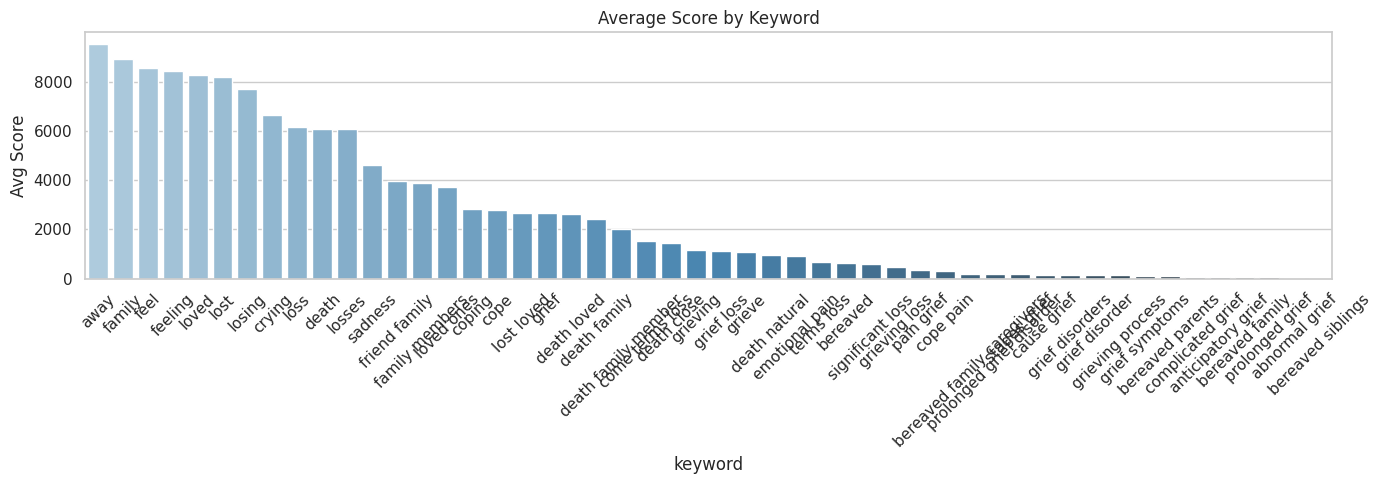

<ipython-input-5-c47ce0207244>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subreddit_stats.index, y=subreddit_stats['num_comments'], palette="Reds_d")


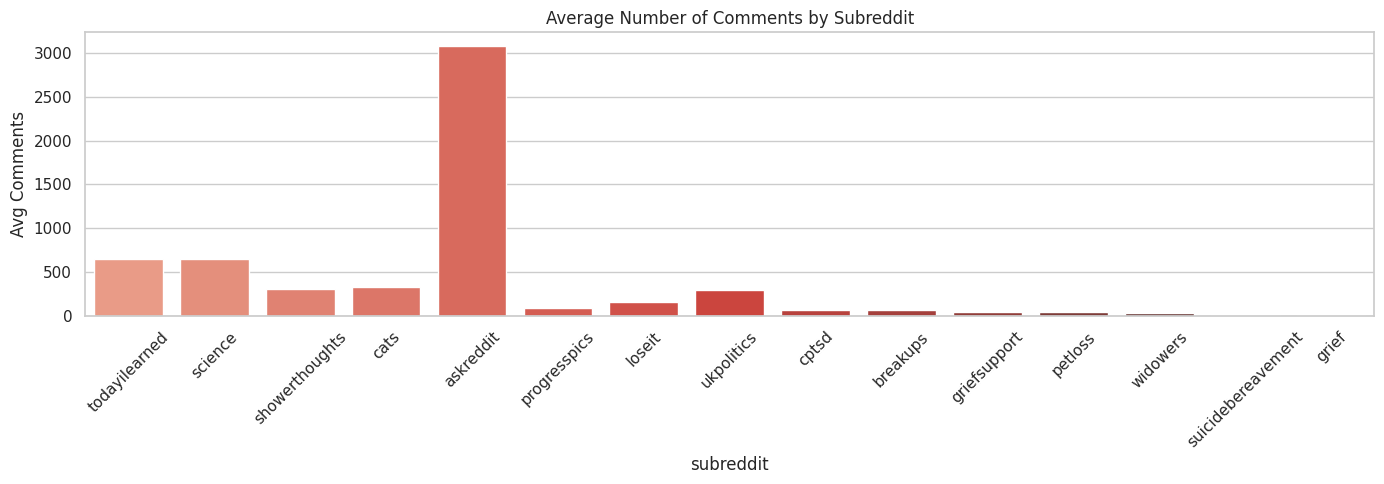

(                                  score  num_comments
 keyword                                              
 away                        9523.065333    889.320000
 family                      8923.874667    809.528000
 feel                        8551.552000    864.772000
 feeling                     8438.117333    877.893333
 loved                       8282.917333   1039.172000
 lost                        8202.874667    962.164000
 losing                      7679.897333    870.090667
 crying                      6649.993333    742.821333
 loss                        6164.033333    555.314667
 death                       6089.313333    930.246667
 losses                      6056.434667    554.992000
 sadness                     4604.532000    665.334667
 friend family               3968.249333    442.542667
 family members              3863.920723    402.474270
 loved ones                  3707.878667    507.006667
 coping                      2806.857333    336.852000
 cope     

In [ ]:
# Group by keyword and calculate average score and comments
keyword_stats = df.groupby('keyword')[['score', 'num_comments']].mean().sort_values(by='score', ascending=False)

# Group by subreddit and calculate average score and comments
subreddit_stats = df.groupby('subreddit')[['score', 'num_comments']].mean().sort_values(by='score', ascending=False)

# Plot: Average score by keyword
plt.figure(figsize=(14, 5))
sns.barplot(x=keyword_stats.index, y=keyword_stats['score'], palette="Blues_d")
plt.title("Average Score by Keyword")
plt.ylabel("Avg Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot: Average comments by subreddit
plt.figure(figsize=(14, 5))
sns.barplot(x=subreddit_stats.index, y=subreddit_stats['num_comments'], palette="Reds_d")
plt.title("Average Number of Comments by Subreddit")
plt.ylabel("Avg Comments")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

keyword_stats, subreddit_stats

In [ ]:
import pandas as pd

# Load the CSV file
file_path = "/content/drive/MyDrive/IRE/reddit_grief_posts_praw (4).csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29714 entries, 0 to 29713
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   subreddit     29714 non-null  object
 1   keyword       29714 non-null  object
 2   title         29714 non-null  object
 3   selftext      20279 non-null  object
 4   created_utc   29714 non-null  object
 5   score         29714 non-null  int64 
 6   num_comments  29714 non-null  int64 
 7   permalink     29714 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.8+ MB


(None,
    subreddit        keyword  \
 0  askreddit  grieving loss   
 1  askreddit  grieving loss   
 2  askreddit  grieving loss   
 3  askreddit  grieving loss   
 4  askreddit  grieving loss   
 
                                                title  \
 0  HELP REDDIT, I need to make Mother's day not s...   
 1  What significant lessons have you learned from...   
 2     How do you grieve the loss of beloved animals?   
 3  What are some tips on grieving the loss of a l...   
 4               How do you grieve the loss of a pet?   
 
                                             selftext          created_utc  \
 0  As I approach our first Mothers day after losi...  2012-05-10 17:42:00   
 1                                                NaN  2025-03-26 16:56:20   
 2                                                NaN  2025-04-22 11:58:27   
 3                                                NaN  2025-03-20 05:50:28   
 4                                                NaN  2025-02-23

In [15]:
# Treat keyword as subtopic
df['subtopic'] = df['keyword'].astype(str).str.lower()

# Group by subtopic and compute average reactions
subtopic_stats = df.groupby('subtopic').agg({
    'score': ['mean', 'std', 'count'],
    'num_comments': ['mean', 'std']
}).sort_values(('score', 'mean'), ascending=False)

print(subtopic_stats)


                                  score                     num_comments  \
                                   mean           std count         mean   
subtopic                                                                   
away                        9523.065333  18700.091854   750   889.320000   
family                      8923.874667  17428.582533   750   809.528000   
feel                        8551.552000  16490.952782   750   864.772000   
feeling                     8438.117333  16375.184386   750   877.893333   
loved                       8282.917333  16174.702247   750  1039.172000   
lost                        8202.874667  15234.331458   750   962.164000   
losing                      7679.897333  16577.668948   750   870.090667   
crying                      6649.993333  14046.422590   750   742.821333   
loss                        6164.033333  13771.568581   750   555.314667   
death                       6089.313333  12073.941232   750   930.246667   
losses      

In [29]:
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download required NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Load your dataset
file_path = "/content/drive/MyDrive/IRE/reddit_grief_posts_praw (4).csv"
df = pd.read_csv(file_path)

# Preprocessing function
def preprocess_text(text):
    if not isinstance(text, str):
        return ""

    # Lowercase
    text = text.lower()

    # Remove URLs, special chars, numbers
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d+', '', text)

    # Remove stopwords and lemmatize
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words and len(word) > 3]

    return ' '.join(tokens)

# Combine title and selftext
df['full_text'] = df['title'] + ' ' + df['selftext'].fillna('')

# Preprocess all text
df['processed_text'] = df['full_text'].apply(preprocess_text)

# Create document-term matrix
vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=5000)
doc_term_matrix = vectorizer.fit_transform(df['processed_text'])

# LDA Model
num_topics = 20  # Start with 20 topics (you can adjust)
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(doc_term_matrix)

# Display top 30 words for each topic
def display_topics(model, feature_names, no_top_words=30):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        topics[f"Topic {topic_idx+1}"] = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
    return topics

feature_names = vectorizer.get_feature_names_out()
all_topics = display_topics(lda_model, feature_names)

# Convert to DataFrame for better visualization
topics_df = pd.DataFrame(all_topics).T

# Print all topics
print("Top 20-30 Subtopics Identified:")
for topic in topics_df.columns:
    print(f"\nTopic {topic}:")
    print(', '.join(topics_df[topic].dropna().tolist()))

# Optional: Save to CSV
topics_df.to_csv('reddit_subtopics.csv', index=False)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Top 20-30 Subtopics Identified:

Topic 0:
labour, comment, year, like, trauma, bill, family, wife, weight, feel, partner, grief, death, relationship, want, food, feel, love, study, cancer

Topic 1:
government, point, time, would, experience, reading, year, loss, loss, like, family, feel, family, said, thing, like, like, life, question, would

Topic 2:
would, brexit, back, know, relationship, private, friend, post, calorie, people, home, year, suicide, would, people, eating, time, time, research, could

Topic 3:
vote, submission, started, feel, self, member, time, child, lose, know, time, like, member, time, time, weight, know, never, people, said

Topic 4:
covid, deal, work, time, life, presented, brother, would, body, life, would, loss, loved, told, help, calorie, thing, someone, science, blood

Topic 5:
people, tory, life, much, others, requires, sister, year, eating, even, back, lost, people, like, need, week, life, know, time, also

Topic 6:
party, say, went, could, need, governmen

##Variance analysis

In [39]:
# Example pseudocode for analysis
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/IRE/reddit_grief_posts_praw (4).csv')

# Basic stats
print(df[['score', 'num_comments']].describe())

# Variance measures
print(f"Score variance: {df['score'].var()}")
print(f"Comments variance: {df['num_comments'].var()}")

              score  num_comments
count   29714.00000  29714.000000
mean     3246.29195    377.886417
std     10382.81187   1760.438942
min         0.00000      0.000000
25%         9.00000      5.000000
50%        64.00000     27.000000
75%       923.75000    144.000000
max    199297.00000  47649.000000
Score variance: 107802782.32384445
Comments variance: 3099145.2688613827


In [41]:
# Group by keyword analysis
keyword_analysis = df.groupby('keyword').agg({
    'score': ['mean', 'median', 'count'],
    'num_comments': ['mean', 'median']
}).sort_values(by=('score', 'mean'), ascending=False)

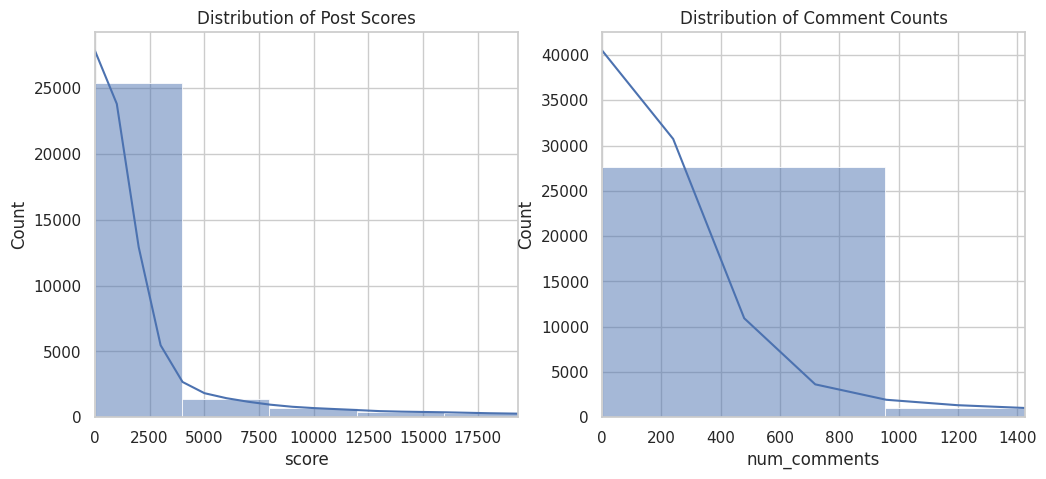

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['score'], bins=50, kde=True)
plt.title('Distribution of Post Scores')
plt.xlim(0, df['score'].quantile(0.95)) # Exclude extreme outliers

plt.subplot(1, 2, 2)
sns.histplot(df['num_comments'], bins=50, kde=True)
plt.title('Distribution of Comment Counts')
plt.xlim(0, df['num_comments'].quantile(0.95))
plt.show()

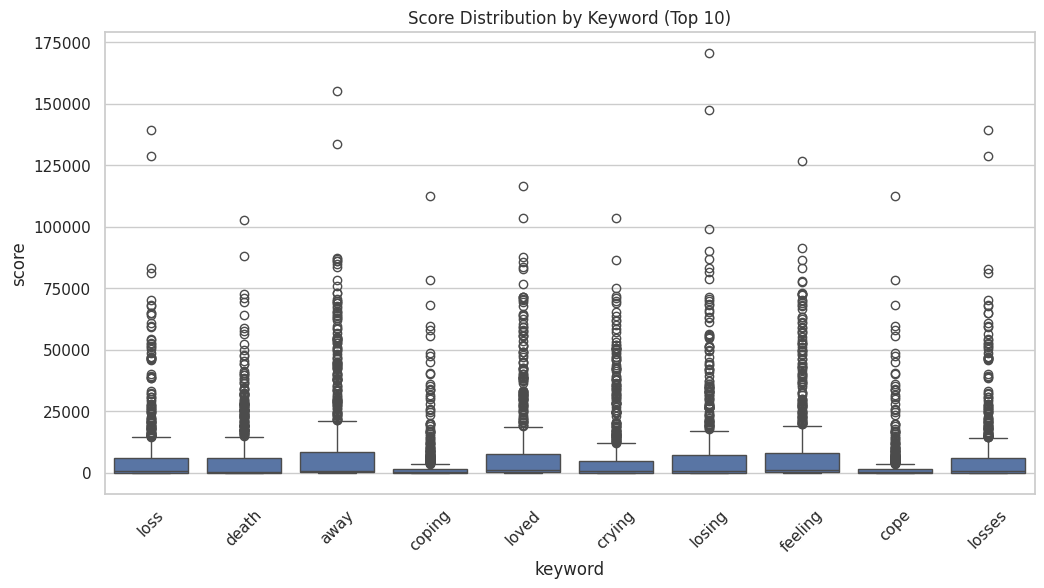

In [43]:
top_keywords = df['keyword'].value_counts().nlargest(10).index

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[df['keyword'].isin(top_keywords)],
            x='keyword', y='score')
plt.title('Score Distribution by Keyword (Top 10)')
plt.xticks(rotation=45)
plt.show()

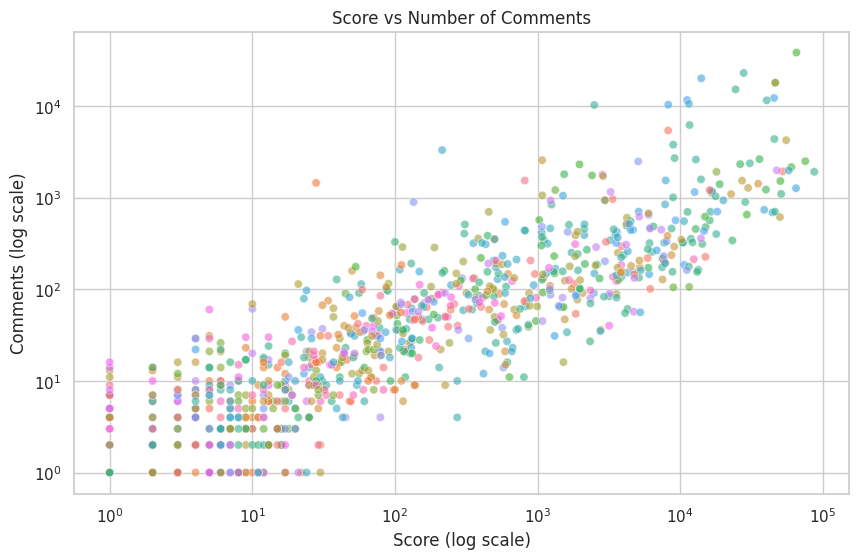

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df.sample(1000), # Sample for performance
                x='score', y='num_comments',
                alpha=0.6, hue='keyword', legend=False)
plt.title('Score vs Number of Comments')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Score (log scale)')
plt.ylabel('Comments (log scale)')
plt.show()

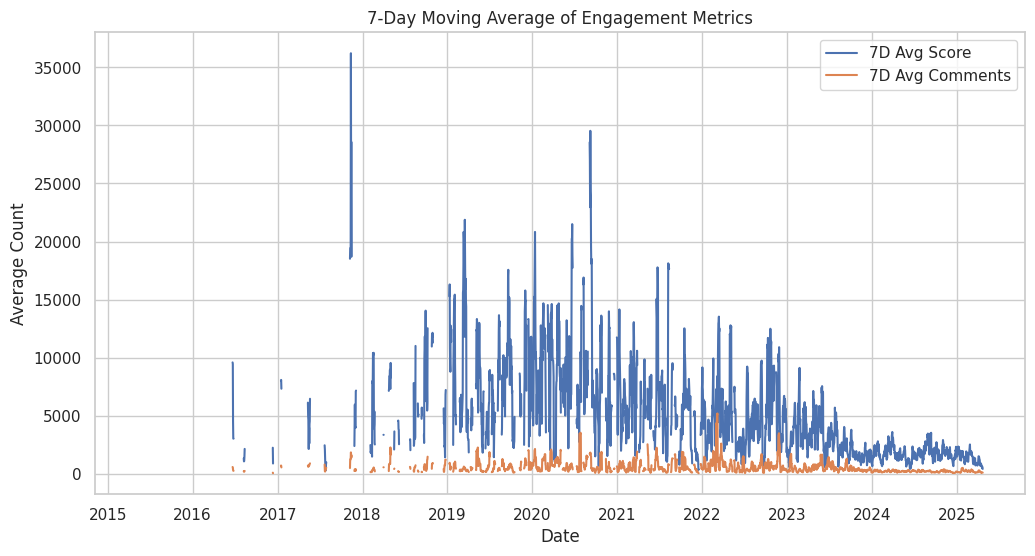

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert to datetime and set as index
df['datetime'] = pd.to_datetime(df['created_utc'], format='%Y-%m-%d %H:%M:%S')

# Set datetime as index for rolling calculations
df.set_index('datetime', inplace=True)

# Resample to daily frequency and calculate mean engagement
daily_engagement = df.resample('D').agg({
    'score': 'mean',
    'num_comments': 'mean',
    'permalink': 'count'
})

# Calculate 7-day moving average
daily_engagement['score_7d_avg'] = daily_engagement['score'].rolling(7).mean()
daily_engagement['comments_7d_avg'] = daily_engagement['num_comments'].rolling(7).mean()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(daily_engagement.index, daily_engagement['score_7d_avg'], label='7D Avg Score')
plt.plot(daily_engagement.index, daily_engagement['comments_7d_avg'], label='7D Avg Comments')
plt.title('7-Day Moving Average of Engagement Metrics')
plt.xlabel('Date')
plt.ylabel('Average Count')
plt.legend()
plt.grid(True)
plt.show()

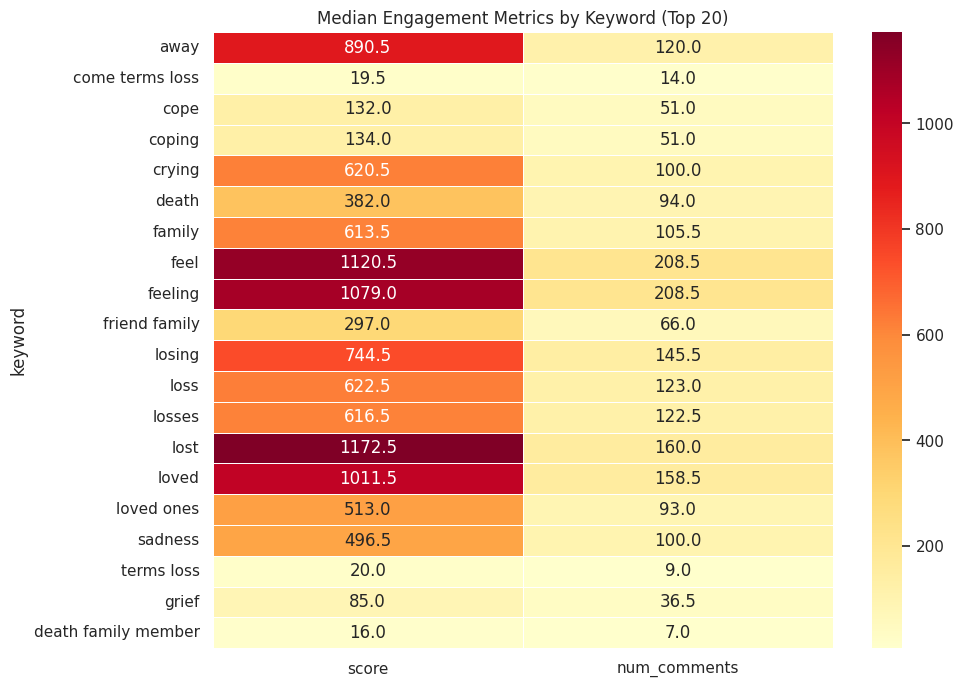

In [46]:
keyword_stats = df.groupby('keyword').agg({
    'score': 'median',
    'num_comments': 'median',
    'permalink': 'count'
}).nlargest(20, 'permalink')

plt.figure(figsize=(10, 8))
sns.heatmap(keyword_stats[['score', 'num_comments']],
            annot=True, fmt=".1f", cmap="YlOrRd",
            linewidths=.5)
plt.title('Median Engagement Metrics by Keyword (Top 20)')
plt.show()

<ipython-input-47-d76207a0408e>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df[df['subreddit'].isin(top_subreddits)],


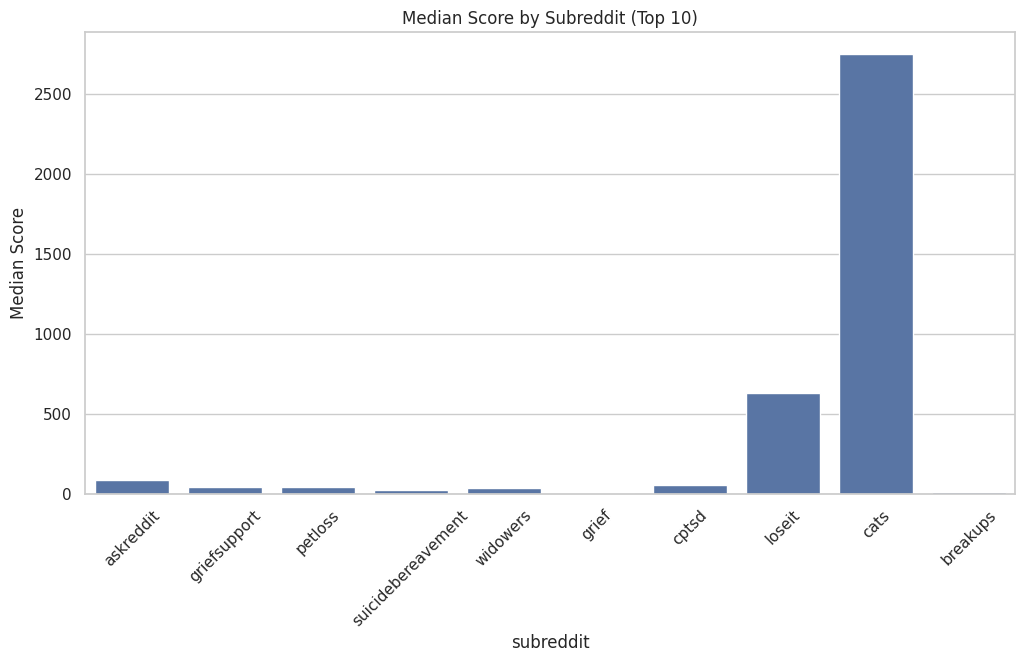

In [47]:
top_subreddits = df['subreddit'].value_counts().nlargest(10).index

plt.figure(figsize=(12, 6))
sns.barplot(data=df[df['subreddit'].isin(top_subreddits)],
            x='subreddit', y='score',
            estimator=np.median, ci=None)
plt.title('Median Score by Subreddit (Top 10)')
plt.xticks(rotation=45)
plt.ylabel('Median Score')
plt.show()

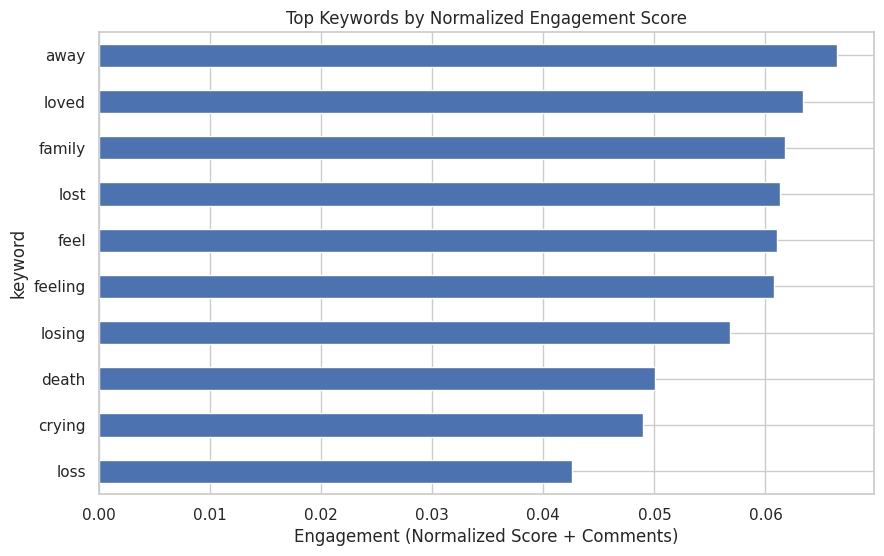

In [48]:
# Create normalized engagement metric
df['engagement'] = (df['score']/df['score'].max() +
                   df['num_comments']/df['num_comments'].max())

# Plot top keywords by engagement
engagement_by_keyword = df.groupby('keyword')['engagement'].mean().nlargest(10)

plt.figure(figsize=(10, 6))
engagement_by_keyword.sort_values().plot(kind='barh')
plt.title('Top Keywords by Normalized Engagement Score')
plt.xlabel('Engagement (Normalized Score + Comments)')
plt.show()

          title_len      body_len
count  29714.000000  29714.000000
mean      90.104698   1648.274315
std       73.540264   3151.121086
min        1.000000      0.000000
25%       39.000000      0.000000
50%       65.000000    717.000000
75%      112.000000   1937.000000
max      300.000000  39631.000000


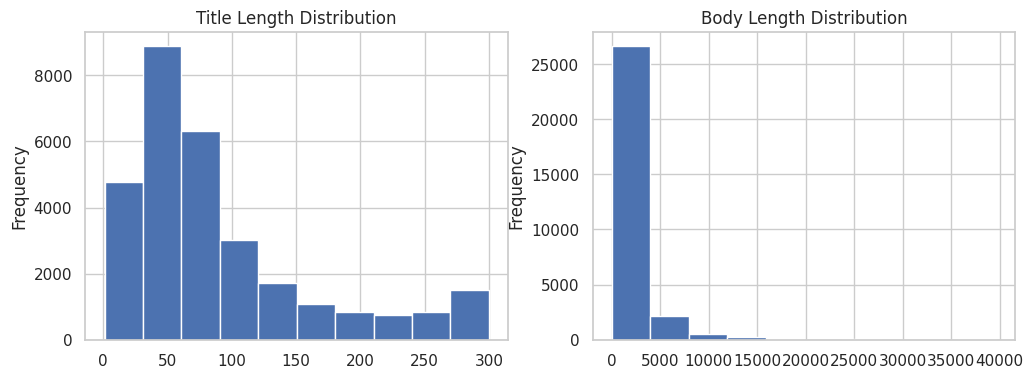

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Load
df = pd.read_csv('/content/drive/MyDrive/IRE/reddit_grief_posts_praw (4).csv', parse_dates=['created_utc'])
df['title_len'] = df['title'].str.len().fillna(0)
df['body_len']  = df['selftext'].fillna('').str.len()

# Summary
print(df[['title_len','body_len']].describe())

# Plot distributions
fig, axes = plt.subplots(1, 2, figsize=(12,4))
df['title_len'].plot(kind='hist', ax=axes[0], title='Title Length Distribution')
df['body_len'].plot(kind='hist',  ax=axes[1], title='Body Length Distribution')
plt.show()


Score variance: 107802782.32384445
Comments variance: 3099145.2688613827


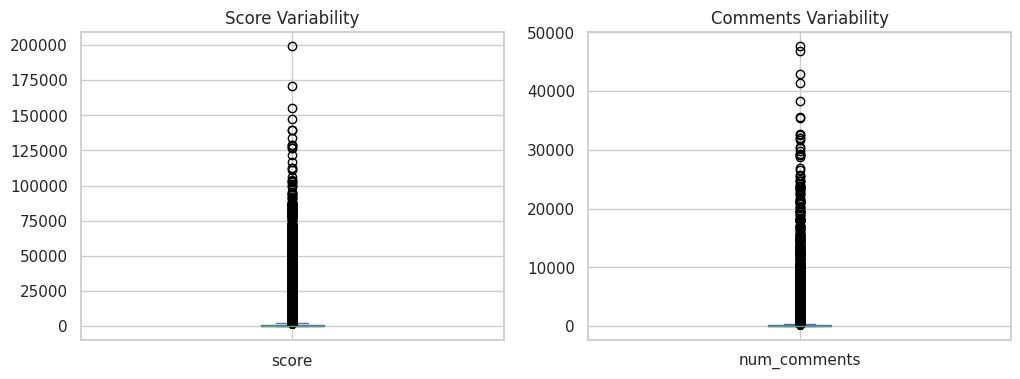

In [55]:
# Variance stats
print("Score variance:", df['score'].var())
print("Comments variance:", df['num_comments'].var())

# Boxplots to visualize spread
fig, axes = plt.subplots(1,2,figsize=(12,4))
df['score'].plot(kind='box', ax=axes[0], title='Score Variability')
df['num_comments'].plot(kind='box', ax=axes[1], title='Comments Variability')
plt.show()

# If you have gender:
if 'gender' in df.columns:
    df.boxplot(column='score', by='gender', grid=False)
    plt.title('Score by Gender')
    plt.suptitle('')
    plt.show()


Topic 0: don, home, didn, know, got, ve, day, time, like, just
Topic 1: people, want, ve, time, life, don, know, feel, like, just
Topic 2: health, trauma, https, requires, people, presented, private, members, 2nd, reading
Topic 3: eating, www, people, calories, loss, body, comments, https, com, weight
Topic 4: http, brexit, eu, points, news, com, www, comments, https, uk


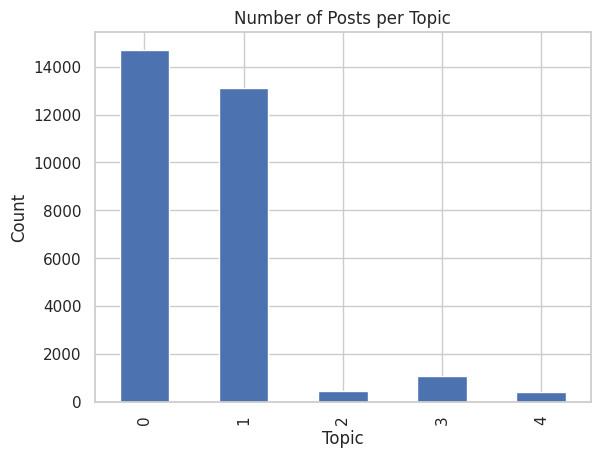

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

texts = df['selftext'].fillna('')
vect = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm  = vect.fit_transform(texts)

lda = LatentDirichletAllocation(n_components=5, random_state=0)
lda.fit(dtm)

# Print topics
for i, comp in enumerate(lda.components_):
    terms = [vect.get_feature_names_out()[j] for j in comp.argsort()[-10:]]
    print(f"Topic {i}: {', '.join(terms)}")

# Assign dominant topic per post
topic_dist = lda.transform(dtm)
df['dominant_topic'] = topic_dist.argmax(axis=1)

# Visualize topic counts
df['dominant_topic'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Posts per Topic')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.show()


<ipython-input-57-041ec1aa6d13>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.resample('M').agg({


                   score  num_comments
created_utc                           
2006-11-30      1.000000      0.000000
2006-12-31           NaN           NaN
2007-01-31           NaN           NaN
2007-02-28           NaN           NaN
2007-03-31           NaN           NaN
...                  ...           ...
2024-12-31   1524.642686    114.881695
2025-01-31   1653.368831    219.959740
2025-02-28   1590.536703    239.761131
2025-03-31   1090.475786    162.547579
2025-04-30    839.925366    128.380255

[222 rows x 2 columns]


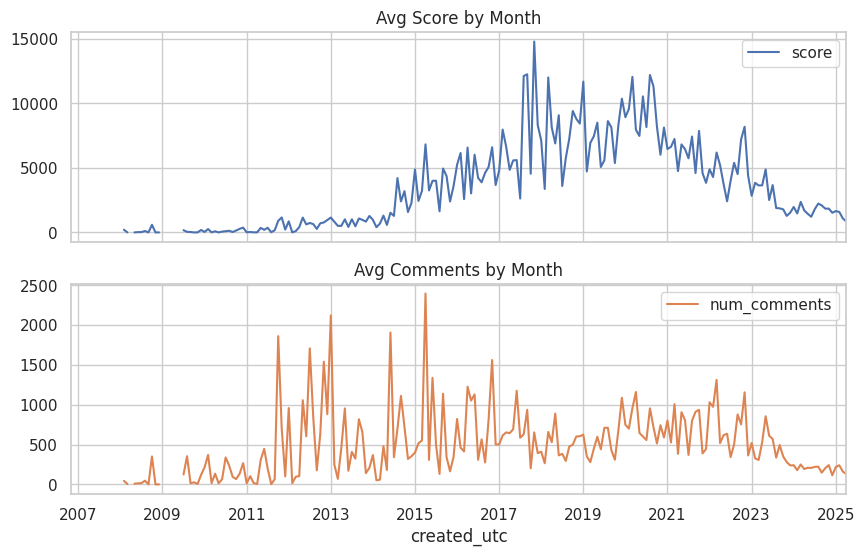

In [57]:
# Resample by month
df.set_index('created_utc', inplace=True)
monthly = df.resample('M').agg({
    'score': 'mean',
    'num_comments': 'mean'
})

# Print and plot
print(monthly)
monthly.plot(subplots=True, figsize=(10,6), title=['Avg Score by Month','Avg Comments by Month'])
plt.show()
